## Agencia de Renta de Autos 
#### Bases de Datos Avanzadas
##### Profesor Botello
###### Por: Inserte Nombre integrantes

En este trabajo vamos a enumerar los pasos a seguir para crear la base de Datos en MongoDB para asi poderla consultar a traves de este notebook escrito con el lenguaje Python
* Creamos un Archivo Generando Nombres de Empleados, Sucursales y Clientes a traves de iteraciones con Python y diccionarios obtenidos en la red
* Realizamos Web Scrapping , y obtenemos datos de renta de vehiculos para utilizar datos más precisos
* Exportamos a CSV los dataframes creados 
* Importamos con la herramienta grafica de MongoDBCompass los csv y los agregamos a las tablas, más que nada las tablas catalogo
* Para las tablas que forman parte de la operacion en este documento iteraremos las diferentes operaciones con el fin de Generar datos lo más precisos posibles
* Vamos a contestar las preguntas generadas en las reglas de negocio apoyandonos de graficas a partir de la libreria matplotlib

#### Conexion a la Base de datos

In [ ]:
#Creamos la base de datos
#import pymongo

#myclient = pymongo.MongoClient("mongodb://localhost:27017/")

#mydb = myclient["RentaVehiculos"]

In [2]:
import pymongo
import json
from pymongo import MongoClient
client = MongoClient('localhost',27017)
db = client['RentaVehiculos']
db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'RentaVehiculos')

In [14]:
print(db.list_collection_names())

['Autos', 'Clientes', 'Sucursales', 'Empleados']


![BasededatosCreada]("./ScreenShots/1.png")

In [10]:
mycol = db["Clientes"]
from pprint import pprint
y = mycol.count_documents({})
print("Numero de documentos :" , y )
for x in mycol.find().limit(3):
  pprint(x)

Numero de documentos : 99
{'Apellido': 'Lillo Amo',
 'Direccion': 'CountryOlive',
 'Email': 'TSAT231020003588@outlook.com',
 'FechaNacimiento': '26/03/1997',
 'INE': '810515',
 'Idioma': 'Ingles/Español',
 'Nombre': 'Valentín',
 'RFC': 'VLIA26031997982',
 'Telefono': '55889597',
 '_id': ObjectId('629cc53dddb894567833c2b8')}
{'Apellido': 'Téllez',
 'Direccion': 'Street,VenezuelaHeather',
 'Email': 'YMAA050619819712@hotmail.com',
 'FechaNacimiento': '09/03/1976',
 'INE': '412346',
 'Idioma': 'Ingles',
 'Nombre': 'Regina',
 'RFC': 'RTÉL09031976739',
 'Telefono': '55951632',
 '_id': ObjectId('629cc53dddb894567833c2b9')}
{'Apellido': 'Rogelio Cuenca Roca',
 'Direccion': 'Lane,VenezuelaCedar',
 'Email': 'ADER260419991673@outlook.com',
 'FechaNacimiento': '19/12/1987',
 'INE': '409106',
 'Idioma': 'Español',
 'Nombre': 'Emigdio',
 'RFC': 'EROC19121987946',
 'Telefono': '55521701',
 '_id': ObjectId('629cc53dddb894567833c2ba')}


Checamos 3  vehiculos existentes 

In [13]:
mycolVehiculos = db["Autos"]
from pprint import pprint
y = mycolVehiculos.count_documents({})
print("Numero de documentos :" , y )
for x in mycolVehiculos.find().limit(3):
  pprint(x)

Numero de documentos : 30
{'Auto': ' Chevrolet Spark',
 'Color': 'Blanco',
 'Combustible': 'Gasolina',
 'Kilometraje': 30500,
 'Modelo': '2017',
 'Placa': '229-PKL',
 'Renta': 288,
 '_id': ObjectId('629cd257ddb894567833c352')}
{'Auto': ' Chevrolet Spark',
 'Color': 'Rojo',
 'Combustible': 'Gasolina',
 'Kilometraje': 28464,
 'Modelo': ' 2016',
 'Placa': '739-UH4',
 'Renta': 918,
 '_id': ObjectId('629cd257ddb894567833c353')}
{'Auto': ' Chevrolet Aveo',
 'Color': 'Gris',
 'Combustible': 'Diesel',
 'Kilometraje': 78158,
 'Modelo': ' 2016',
 'Placa': '443-GXS',
 'Renta': 520,
 '_id': ObjectId('629cd257ddb894567833c354')}


Creamos la tabla Reservaciones

In [15]:
#NuevaColeccionReservaciones = db["Reservaciones"]

Cargaremos en tres listas los diferentes ID para crear de manera dinamica la tabla de reservaciones

In [21]:
idCliente = []
mycol = db["Clientes"]
for x in mycol.find():
    idCliente.append((x["_id"]))

In [24]:
idAutos = []
colAutos = db["Autos"]
for x in colAutos.find():
    idAutos.append((x["_id"]))

In [26]:
idEmpleados = []
colEmpleados = db["Empleados"]
for x in colEmpleados.find():
    idEmpleados.append((x["_id"]))

In [85]:

import json
import random as rd
import datetime
from bson import json_util
import csv
from pathlib import Path  
import pandas as pd

In [52]:
def generarFechas():
    return datetime.datetime(rd.randint(2019,2022), rd.randint(1,4), rd.randint(1,28))

In [83]:
# Datos para ser escrito el diccionario que creara un dump de csv
idClientes = []
idVendedor = []
idVehiculo = []
StatusReserva = []
FechasSalida = []
FechasIngreso = []

for x in range(100):
    idClientes.append(idCliente[rd.randint(0,len(idCliente))])
    idVendedor.append(idEmpleados[rd.randint(0,len(idEmpleados))])
    idVehiculo.append(idAutos[rd.randint(0,len(idAutos))])
    StatusReserva.append(rd.randint(0,3))
    FechasSalida.append(generarFechas())
    FechasIngreso.append(generarFechas())


In [84]:

Reservacion = pd.DataFrame(list(zip(idClientes, idVendedor,idVehiculo,StatusReserva,FechasSalida,FechasIngreso)),
               columns =['idCliente', 'idEmpleado', 'idVehiculo','StatusReserva','FechaSalida','FechaIngreso'])

Reservacion

,idCliente,idEmpleado,idVehiculo,StatusReserva,FechaSalida,FechaIngreso
0,629cc53dddb894567833c2f3,629cc8a5ddb894567833c334,629cd257ddb894567833c35c,3,2021-04-21,2019-02-17
1,629cc53dddb894567833c316,629cc8a5ddb894567833c328,629cd257ddb894567833c365,2,2020-03-14,2022-04-20
2,629cc53dddb894567833c2d5,629cc8a5ddb894567833c320,629cd257ddb894567833c368,1,2019-01-09,2021-02-12
3,629cc53dddb894567833c2d7,629cc8a5ddb894567833c32d,629cd257ddb894567833c352,3,2020-03-10,2019-01-28
4,629cc53dddb894567833c313,629cc8a5ddb894567833c320,629cd257ddb894567833c358,1,2022-03-28,2022-01-27
...,...,...,...,...,...,...
95,629cc53dddb894567833c318,629cc8a5ddb894567833c31d,629cd257ddb894567833c353,0,2021-04-27,2020-02-05
96,629cc53dddb894567833c2e3,629cc8a5ddb894567833c321,629cd257ddb894567833c358,2,2022-04-27,2019-04-21
97,629cc53dddb894567833c2c7,629cc8a5ddb894567833c32b,629cd257ddb894567833c362,2,2020-01-19,2022-01-12
98,629cc53dddb894567833c2d0,629cc8a5ddb894567833c32a,629cd257ddb894567833c35d,2,2020-02-13,2022-02-02


In [86]:
#Autos
filepath = Path('CSV/Reservacion.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
Reservacion.to_csv(filepath)  

In [11]:
#seleccionar cuantas veces se rento este carro 629cd257ddb894567833c35d
from bson.objectid import ObjectId
mycol2 = db["Reservacion"]
for x in mycol2.find({"idVehiculo":ObjectId("629cd257ddb894567833c365")}):
  pprint(x)

{'FechaIngreso': datetime.datetime(2022, 4, 20, 0, 0),
 'FechaSalida': datetime.datetime(2020, 3, 14, 0, 0),
 'StatusReserva': 2,
 '_id': ObjectId('629ceff1fdb2f724e1b127e2'),
 'idCliente': ObjectId('629cc53dddb894567833c316'),
 'idEmpleado': ObjectId('629cc8a5ddb894567833c328'),
 'idVehiculo': ObjectId('629cd257ddb894567833c365')}
{'FechaIngreso': datetime.datetime(2019, 3, 23, 0, 0),
 'FechaSalida': datetime.datetime(2019, 1, 22, 0, 0),
 'StatusReserva': 1,
 '_id': ObjectId('629ceff1fdb2f724e1b127e7'),
 'idCliente': ObjectId('629cc53dddb894567833c2f3'),
 'idEmpleado': ObjectId('629cc8a5ddb894567833c33b'),
 'idVehiculo': ObjectId('629cd257ddb894567833c365')}
{'FechaIngreso': datetime.datetime(2022, 1, 8, 0, 0),
 'FechaSalida': datetime.datetime(2021, 4, 15, 0, 0),
 'StatusReserva': 0,
 '_id': ObjectId('629ceff1fdb2f724e1b127f8'),
 'idCliente': ObjectId('629cc53dddb894567833c2bf'),
 'idEmpleado': ObjectId('629cc8a5ddb894567833c340'),
 'idVehiculo': ObjectId('629cd257ddb894567833c365')}

In [18]:
VecesQueSeUsoXAuto = {}

Reservacion = db["Reservacion"]
Autos = db["Autos"]

for x in Autos.find({"_id":ObjectId("629cd257ddb894567833c365")}):
  print(x)

for x in Reservacion.find({"idVehiculo":ObjectId("629cd257ddb894567833c365")}):
    print( 'ID: ' , x['_id'] , "Auto:" , x['idVehiculo'])
    VecesQueSeUsoXAuto.update({x['_id'] : x['idVehiculo'] })

{'_id': ObjectId('629cd257ddb894567833c365'), 'Auto': ' Fiat Uno', 'Modelo': ' 2019', 'Renta': 741, 'Color': 'Verde', 'Kilometraje': 59211, 'Combustible': 'Gasolina', 'Placa': '643-NZJ'}
ID:  629ceff1fdb2f724e1b127e2 Auto: 629cd257ddb894567833c365
ID:  629ceff1fdb2f724e1b127e7 Auto: 629cd257ddb894567833c365
ID:  629ceff1fdb2f724e1b127f8 Auto: 629cd257ddb894567833c365
ID:  629ceff1fdb2f724e1b12805 Auto: 629cd257ddb894567833c365
ID:  629ceff1fdb2f724e1b12825 Auto: 629cd257ddb894567833c365


TypeError: unsupported operand type(s) for +: 'int' and 'ObjectId'

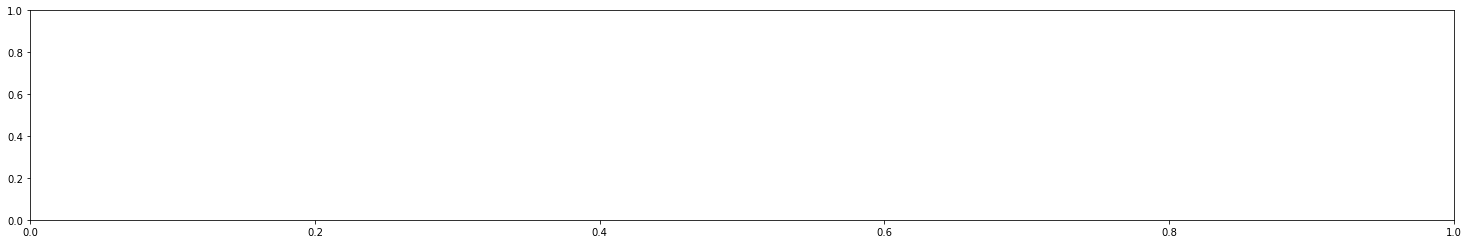

In [19]:
import matplotlib.pyplot as plt
from matplotlib import style


#print(plt.style.available)

plt.rcParams["figure.figsize"] = [20.50, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.style.use('vibrant')
plt.bar(range(len(VecesQueSeUsoXAuto)), list(VecesQueSeUsoXAuto.values()), align='center')
plt.xticks(range(len(VecesQueSeUsoXAuto)), list(VecesQueSeUsoXAuto.keys()))
plt.xticks(fontsize=10)
plt.show()